In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def global_setting():
    sns.set_style("white")

    plt.rcParams.update({                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
        "font.sans-serif": [],
        "font.monospace": [],
        "figure.figsize": (12,8),
        "axes.labelsize": 12,               # LaTeX default is 10pt font.
        "font.size": 11,
        "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 10,
        "ytick.labelsize": 10
        })
global_setting()

Matplotlib created a temporary config/cache directory at /localscratch/1848513/matplotlib-m7i7ivgt because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [13]:
class_to_node = '/home/mridul/data/fish_diffusion/class_to_ancestral_label.pkl'
with open(class_to_node, 'rb') as pickle_file:
    class_to_node_dict = pickle.load(pickle_file)
all_classes = []
for class_name, node_representation in (class_to_node_dict.items()):
    all_classes.append(class_name)

all_classes = sorted(all_classes)

from ldm.data.phylogeny import Phylogeny
phylogeny = Phylogeny("/home/mridul/data/fish_diffusion", all_classes)


tree = phylogeny.tree

dist = np.zeros(shape=(38, 38))

for i in range(38):
    for j in range(38):
        if i!=j:
            i_th = 'ott' + str(phylogeny.ott_id_dict[all_classes[i]])
            j_th = 'ott' + str(phylogeny.ott_id_dict[all_classes[j]])
            dist[i][j] = tree.get_distance(i_th, j_th)

normalized_array = (dist - dist.min()) / (dist.max() - dist.min())

{'Alosa chrysochloris': 482298, 'Carassius auratus': 1005907, 'Cyprinus carpio': 429083, 'Esox americanus': 496115, 'Gambusia affinis': 617445, 'Lepisosteus osseus': 519445, 'Lepisosteus platostomus': 731608, 'Lepomis auritus': 1002718, 'Lepomis cyanellus': 476361, 'Lepomis gibbosus': 670266, 'Lepomis gulosus': 476359, 'Lepomis humilis': 892772, 'Lepomis macrochirus': 836783, 'Lepomis megalotis': 271249, 'Lepomis microlophus': 271244, 'Morone chrysops': 246133, 'Morone mississippiensis': 769290, 'Notropis atherinoides': 636312, 'Notropis blennius': 419165, 'Notropis boops': 443777, 'Notropis buccatus': 269524, 'Notropis buchanani': 555686, 'Notropis dorsalis': 419160, 'Notropis hudsonius': 135051, 'Notropis leuciodus': 338652, 'Notropis nubilus': 550199, 'Notropis percobromus': 403731, 'Notropis stramineus': 351741, 'Notropis telescopus': 550190, 'Notropis texanus': 550208, 'Notropis volucellus': 351735, 'Notropis wickliffi': 563834, 'Noturus exilis': 678206, 'Noturus flavus': 101864, 

In [14]:
normalized_array

array([[0.        , 0.64774604, 0.64774604, ..., 0.64774604, 0.64774604,
        0.64774604],
       [0.64774604, 0.        , 0.05681078, ..., 0.56497331, 0.56497331,
        0.44199014],
       [0.64774604, 0.05681078, 0.        , ..., 0.56497331, 0.56497331,
        0.44199014],
       ...,
       [0.64774604, 0.56497331, 0.56497331, ..., 0.        , 0.0859495 ,
        0.56497331],
       [0.64774604, 0.56497331, 0.56497331, ..., 0.0859495 , 0.        ,
        0.56497331],
       [0.64774604, 0.44199014, 0.44199014, ..., 0.56497331, 0.56497331,
        0.        ]])

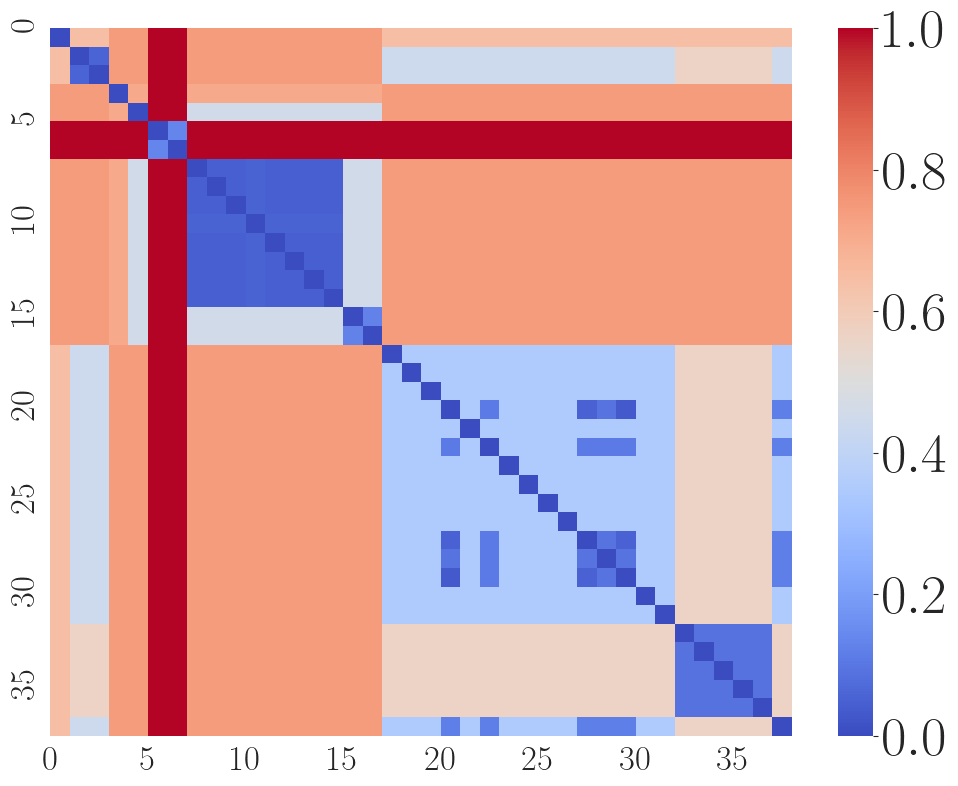

Yay


In [20]:
plt.figure(figsize=(10, 8))
heat_map = sns.heatmap(normalized_array, cmap='coolwarm', annot=False)

cbar = heat_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=40) 


# Calculate the tick positions and labels for every 5th column
xtick_positions = np.arange(0, normalized_array.shape[1], 5)
xtick_labels = [str(x) for x in xtick_positions]

# Calculate the tick positions and labels for every 5th row
ytick_positions = np.arange(0, normalized_array.shape[0], 5)
ytick_labels = [str(y) for y in ytick_positions]

# Set x-ticks and y-ticks
plt.xticks(ticks=xtick_positions, labels=xtick_labels, fontsize=25)
plt.yticks(ticks=ytick_positions, labels=ytick_labels, fontsize=25)


os.makedirs('/home/mridul/sample_ldm/similarity_final_small', exist_ok=True)
# Saving the plot
file_path = '/home/mridul/sample_ldm/similarity_final_small/phylogeny_dist.png'

plt.tight_layout()
plt.savefig(file_path)
plt.show()

print('Yay')